<a href="https://colab.research.google.com/github/Nikshit-Vora/Data-Analysis---Petroleum-Tech./blob/main/Permeability_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Willy and Gardner methode for unconsolidated and well sorted sand

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
sw = np.linspace(0.25,0.70,10)

swc = 0.25
soc = 0.3
sgc = 0.05

In [9]:
df_1 = pd.DataFrame(sw,columns=["sw"])

In [10]:
df_1

,sw
0,0.25
1,0.30
2,0.35
3,0.40
4,0.45
5,0.50
6,0.55
7,0.60
8,0.65
9,0.70


# sw = water saturation

# sw* = (sw - swc)/(1 - swc)                                                        
# kro = (1 - sw**)^3                                                              
# krw = (sw*)^3

In [11]:
df_1["sw*"] = (df_1["sw"] - swc)/(1-swc)

df_1['kro'] = (1 - df_1["sw*"])**3

df_1['krw'] = (df_1['sw*'])**3

In [12]:
df_1

,sw,sw*,kro,krw
0,0.25,0.000000,1.000000,0.000000
1,0.30,0.066667,0.813037,0.000296
2,0.35,0.133333,0.650963,0.002370
3,0.40,0.200000,0.512000,0.008000
4,0.45,0.266667,0.394370,0.018963
5,0.50,0.333333,0.296296,0.037037
6,0.55,0.400000,0.216000,0.064000
7,0.60,0.466667,0.151704,0.101630
8,0.65,0.533333,0.101630,0.151704
9,0.70,0.600000,0.064000,0.216000


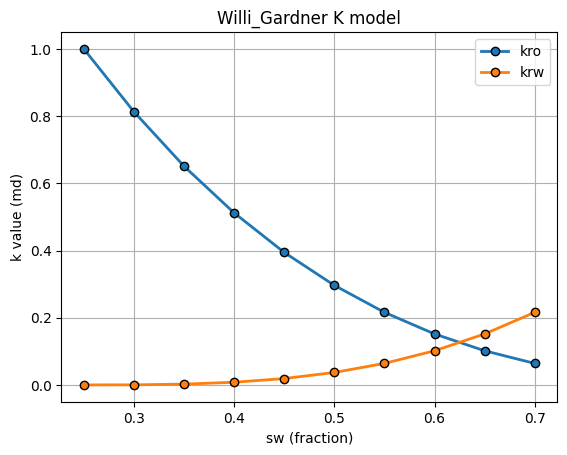

In [47]:
plt.style.use("default")

plt.plot(df_1['sw'],df_1['kro'],label="kro", linewidth=2, marker="o",mec="black")
plt.plot(df_1['sw'],df_1['krw'], label="krw",linewidth=2, marker='o',mec="black")

plt.xlabel("sw (fraction)")
plt.ylabel("k value (md)")

plt.title("Willi_Gardner K model")

plt.grid()
plt.legend()
plt.show()

# 2) Pirson's model

# sw* = (sw - swc)/(1 - swc)
# krw = ((sw*)^0.5) * sw^3
# kro = (1 - (sw star*)) * [(1 - (sw*)^0.25)^0.5] * sw^0.5

In [19]:
df_2 = pd.DataFrame(sw,columns=['sw'])

In [20]:
df_2

,sw
0,0.25
1,0.30
2,0.35
3,0.40
4,0.45
5,0.50
6,0.55
7,0.60
8,0.65
9,0.70


In [39]:
df_2['sw*'] = (df_2['sw'] - swc)/(1 - swc)

df_2['krw'] = np.sqrt(df_2['sw*'])*(df_2['sw'])**3

df_2['kro'] = (1 - df_2['sw*'])*((1 - (df_2['sw*'])**0.25)**0.5)*((df_2['sw'])**0.5)



In [40]:
df_2

,sw,sw*,krw,kro
0,0.25,0.000000,0.000000,0.500000
1,0.30,0.066667,0.006971,0.358527
2,0.35,0.133333,0.015656,0.322539
3,0.40,0.200000,0.028622,0.291209
4,0.45,0.266667,0.047057,0.260954
5,0.50,0.333333,0.072169,0.231019
6,0.55,0.400000,0.105225,0.201337
7,0.60,0.466667,0.147556,0.172069
8,0.65,0.533333,0.200558,0.143478
9,0.70,0.600000,0.265687,0.115877


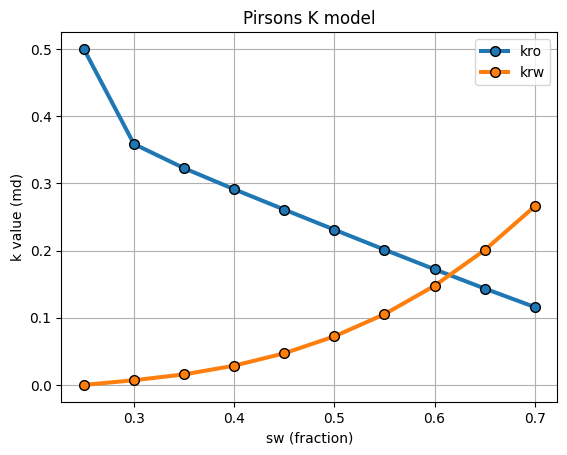

In [50]:
plt.style.use("default")

plt.plot(df_2['sw'],df_2['kro'],label="kro", linewidth=2.9, marker="o",ms=7,mec="black")
plt.plot(df_2['sw'],df_2['krw'], label="krw",linewidth=2.9, marker='o',ms=7,mec="black")

plt.xlabel("sw (fraction)")
plt.ylabel("k value (md)")

plt.title("Pirsons K model")

plt.grid()
plt.legend()
plt.show()

# 3) Brooke - Corey Model for Gas-oil k curve

In [51]:
sg=np.linspace(0.05,0.70,10)

swc = 0.25

# sg* = sg/(1 - swc)
# kro = (1 - sg*)^4
# krg = ((sg*)^3) * (2 - sg_star)

In [54]:
df_3 = pd.DataFrame(sg,columns=['sg'])

In [55]:
df_3

,sg
0,0.050000
1,0.122222
2,0.194444
3,0.266667
4,0.338889
5,0.411111
6,0.483333
7,0.555556
8,0.627778
9,0.700000


In [56]:
df_3['sg*'] = df_3['sg']/(1 - swc)

df_3['kro'] = (1 - df_3['sg*'])**4

df_3['krg'] = ((df_3['sg*'])**3) * (2 - df_3['sg*'])

In [57]:
df_3

,sg,sg*,kro,krg
0,0.050000,0.066667,0.758835,0.000573
1,0.122222,0.162963,0.490884,0.007950
2,0.194444,0.259259,0.301068,0.030335
3,0.266667,0.355556,0.172481,0.073917
4,0.338889,0.451852,0.090280,0.142824
5,0.411111,0.548148,0.041685,0.239120
6,0.483333,0.644444,0.015982,0.362805
7,0.555556,0.740741,0.004518,0.511816
8,0.627778,0.837037,0.000705,0.682024
9,0.700000,0.933333,0.000020,0.867240


<function matplotlib.pyplot.show>

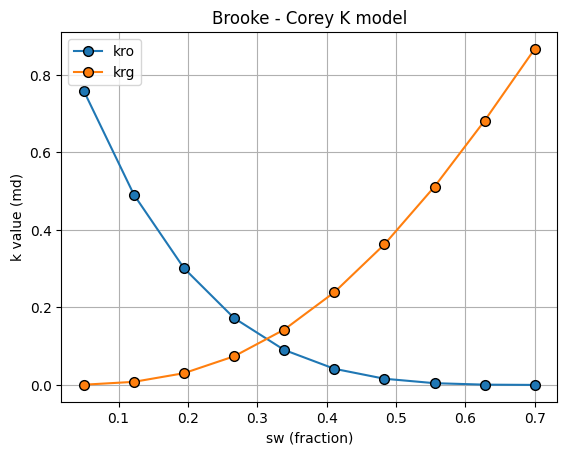

In [60]:
plt.style.use('default')

plt.plot(df_3['sg'],df_3['kro'], label='kro',marker='o',mec='black',ms='7')
plt.plot(df_3['sg'],df_3['krg'], label='krg',marker='o',mec='black',ms='7')

plt.xlabel("sw (fraction)")
plt.ylabel('k value (md)')

plt.title('Brooke - Corey K model')
plt.legend()
plt.grid()
plt.show